In [49]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
%matplotlib inline
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2

# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = 18 #fig_width_pt*inches_per_pt  # width in inches
fig_height = 5 # fig_width*golden_mean*2      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 20,
          'text.fontsize': 16,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

# --------------- Latex Plot Beautification --------------------------

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Energy mode
(3, 800, 450)


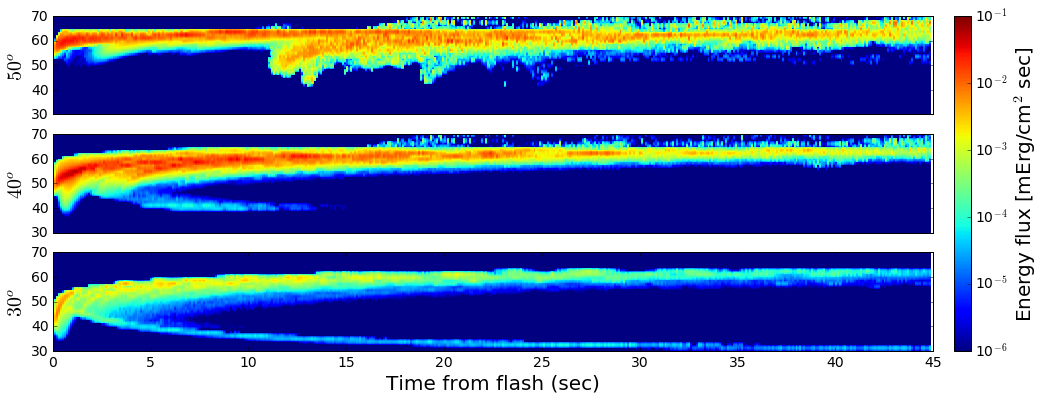

In [50]:
# Plot typical data from the precipitation model:
# time x out_lat,   1 plot per in_lat
# (For CEDAR 2016 poster)

from precip_model import precip_model

p = precip_model(database="db8_downsampled_oldrun.pkl", cumsum=False, mode='energy')

lat_targ = np.arange(30, 70,step=0.05)
in_lat_targ = [50,40,30]
num_inlats = len(in_lat_targ)
t = p.t

clims = [-6,-1]

interp_d = p.get_multiple_precip_at(in_lat_targ, lat_targ, t)
print np.shape(interp_d)

fig = plt.figure()
ax = []
for i,lat in enumerate(in_lat_targ):
    ax.append(fig.add_subplot(num_inlats,1,i+1))
    #Nv = np.log10(interp_d[i,:,2:] - interp_d[i,:,0:-2])
    Nv = np.log10(interp_d[i,:,:])


    Nv = np.clip(Nv,clims[0],clims[1])
#     pl = plt.imshow(Nv,origin='lower',interpolation='none')
    p1 = plt.pcolormesh(t, lat_targ, Nv)
    ax[i].set_xticks([])
    ax[i].set_yticks([30, 40, 50, 60, 70])
    ax[i].set_ylabel('$%d^o$'%lat)
    
    plt.clim(clims)

ax[-1].set_xticks(np.arange(0, t[-1]+1,step=5))
ax[-1].set_xlabel('Time from flash (sec)')

cb = plt.colorbar(p1, ax=ax, pad=0.02)
ctix = np.arange(clims[0], clims[1] + 1, step=1)
cb.set_ticks(ctix)
cb.set_ticklabels(['10$^{%d}$'%k for k in ctix])
cb.set_label('Energy flux [mErg/cm$^2$ sec]')

plt.savefig('2d_sim.png',bb_inches='tight',dpi=300)
# print "range/interval:",np.min(interp_d)/p.t[-1],np.max(interp_d)/p.t[-1]
# print "range/T_STEP:", np.min(interp_d)/p.sc.T_STEP, np.max(interp_d)/p.sc.T_STEP